# Sistemas Inteligentes

## Exercício Computacional 1 - Classificação

Neste laboratório serão explorados os classificadores **KNN** e **Decision Tree**. Também vamos explorar a métrica de **Acurácia** e conhecer a **Confusion Matrix**.

### Identificação do Aluno

#### Nome Completo

Gabriel Sponda Freitas Bettarello

#### RA

11201932580

### Importação e preparação dos dados

Importe o pacote **datasets** da biblioteca **sklearn**, então carregue o dataset de imagens de dígitos, utilizando a função **load_digits()** do pacote de datasets importado, já atribuindo-o à variável **digits_dataset**.

In [ ]:
from sklearn import datasets

digits_dataset = datasets.load_digits()

Tendo feito o processo adequadamente, a variável **digits_dataset** conterá todo o dataset correspondente, inclusive com informações que não são de nosso interesse para esta atividade. Para selecionar apenas o que é de nosso interesse, atribua à variável **digits_img** apenas o objeto **images** de **digits_dataset**.

In [ ]:
digits_img = digits_dataset.images

Verifique o formato de **digits_img**.

In [ ]:
print(digits_img.shape)

(1797, 8, 8)


Imprima **digits_img** para que seja possível ver como são os dados que temos no momento.

In [ ]:
print(digits_img)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

Sabendo que esta estrutura se refere a um conjunto de imagens, pode ser interessante imprimir ao menos uma ou duas para visualizarmos como é o seu padrão.

Para fazer isso, importe o pacote de funções **pyplot** da biblioteca **matplotlib**. Apesar de não ser obrigatório, para facilitar, recomenda-se utilizar um "apelido" para esse tipo de pacote com nome tão grande, a fim de tornar o seu uso mais prático. É comum utilizar o termo "plt" para o pyplot, mas você pode chamar como preferir.

In [ ]:
import matplotlib.pyplot as plt

Depois de importar o pacote, utilize a função **imshow()** do **pyplot** para imprimir na tela uma das imagens contidas em **digits_img**.

Obs: caso tenha sido utilizado um apelido na importação do pacote, lembre-se dele quando for chamar suas funções, como é o caso agora.

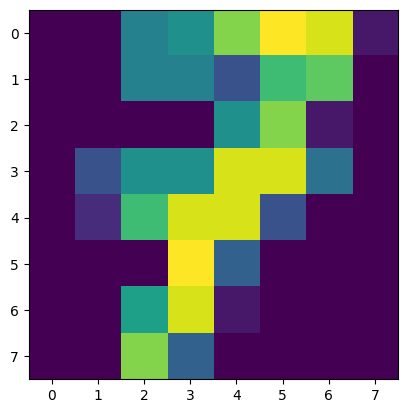

In [ ]:
plt.imshow(digits_img[7])
plt.show()

Apesar de esse tipo de formato permitir que essas imagens sejam elegantemente exibidas a nós, humanos, não se trata de um formato tão interessante para se efetuar processamentos computacionais. Por isso, faça uma mudança no formato da estrutura utilizando a função **reshape()** da biblioteca **numpy**. Como tal biblioteca ainda não for importada, comece por sua importação, preferencialmente utilizando o apelido "np" para tornar mais prática a sua utilização.

In [ ]:
import numpy as np

Agora, com a biblioteca já importada, utilize a função **reshape()** para forçar um formato unidimensional para cada imagem dentro da matriz original.

Note que o número de imagens não pode ser alterado, tampouco as imagens em si; apenas o formato da representação de cada uma dessas imagens pode sofrer alteração.

In [ ]:
digits_img_reshaped = digits_img.reshape(digits_img.shape[0], -1)

Agora verifique se o novo formato está como desejava-se obter. Se o novo formato for bidimensional, o número de imagens for o mesmo que o original e o número de pixels for o mesmo que o original, então está correto.

In [ ]:
print(digits_img_reshaped.shape)

(1797, 64)


Agora que já temos os dados de entrada adequadamente preparados, precisamos dos dados de saída correspondentes. Então, atribua o objeto **target** de **digits_dataset** à variável **digits_target**.

In [ ]:
digits_target = digits_dataset.target

Imprima **digits_target** para visualizar como são esses dados

In [ ]:
print(digits_target)

[0 1 2 ... 8 9 8]


Agora imprima o formato de **digits_target** para saber exatamente as suas dimensões.

In [ ]:
print(digits_target.shape)

(1797,)


#### Divisão dos dados em grupos para treinamento e teste.

Importe a função **train_test_split()** do pacote **model_selection**, pertencente à biblioteca **sklearn**.

In [ ]:
from sklearn.model_selection import train_test_split

Agora, utilizando a função **train_test_split()**, divida os dados de entrada e saída, **digits** e **digits_target**, respectivamente, separando-os em dados de treinamento e de testes para entrada e saída, ou seja, **x_train**, **x_test**, **y_train** e **y_test**.

Separe 25% para testes utilizando o argumento *test_size* da própria função **train_test_split()**.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(digits_img_reshaped, digits_target, test_size=0.25, random_state=28)

Imprima, em diferentes células, o formato de cada uma das partes obtidas.

In [ ]:
print(x_train.shape)

(1347, 64)


In [ ]:
print(x_test.shape)

(450, 64)


In [ ]:
print(y_train.shape)

(1347,)


In [ ]:
print(y_test.shape)

(450,)


### K-Nearest Neighbors (KNN)

#### Treinamento

Importe o classificador do KNN, que é uma função chamada **KNeighborsClassifier** do pacote **neighbors**, que faz parte da biblioteca **sklearn**.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Agora crie o classificador com o nome **knn** utilizando para o argumento *n_neighbors* da função **KNeighborsClassifier** o número de vizinhos próximos que serão considerados pelo algoritmo. Lembre-se de preferir um número ímpar não muito grande.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

Treine o classificador **knn** por meio de sua própria função **fit()**, atribuindo o resultado ao próprio **knn**. Os argumentos da função **fit()** são os dados de entrada e saída de treinamento, ou seja, **x_train** e **y_train**.

In [ ]:
knn = knn.fit(x_train, y_train)

#### Classificação

Então, faça a classificação (também chamada de predição), utilizando a função **predict()** do próprio classificador **knn**. O argumento da função é apenas a entrada de teste, ou seja, **x_test**. Atribua a saída dessa classificação à variável **y_pred**.

In [ ]:
y_pred = knn.predict(x_test)

#### Resultados

Para analisar os resultados, precisamos utilizar algumas ferramentas e métricas. A biblioteca **sklearn** possui um grande conjunto de funções para essa finalidade em seu pacote **metrics**. Importe as funções **accuracy_score** e **confusion_matrix**.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

Comece utilizando a função **accuracy_score** para calcular a acurácia do classificador. Esta é uma das mais comuns métricas para se verificar o desempenho do classificador. O primeiro argumento da função é o conjunto de saídas esperadas, ou seja, **y_test**; o segundo, o conjunto de saídas obtidas pela predição do classificador utilizado, ou seja, **y_pred**.

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9755555555555555


Gere a matriz de confusão utilizando a função **confusion_matrix**.

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[39  0  0  0  0  0  0  0  0  0]
 [ 0 51  0  0  0  0  0  0  0  0]
 [ 0  0 46  0  0  0  0  1  0  0]
 [ 0  0  0 46  0  1  0  2  0  0]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  0  0 35  1  0  0  0]
 [ 0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 47  0  0]
 [ 0  2  0  0  0  0  0  0 46  1]
 [ 0  0  0  0  0  1  0  0  1 42]]


### Decision Tree

#### Treinamento

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Assim como foi feito com o KNN, crie um classificador de Decision Tree chamado **dt** utilizando agora a função **DecisionTreeClassifier**.

In [ ]:
dt = DecisionTreeClassifier()

Treine classificador **dt** utilizando a função **fit** com os dados de treinamento, **x_train** e **y_train**, respectivamente.

In [ ]:
dt = dt.fit(x_train, y_train)

#### Classificação

Faça a classificação dos dados de entrada para testes, **x_test**, utilizando a função **predict** do próprio **dt** e armazene os resultados em **y_pred**.

In [ ]:
y_pred = dt.predict(x_test)

#### Resultados

Verifique a acurácia do classificador **dt** por meio da função **accuracy_score**.

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8355555555555556


Mostre a matriz de confusão do classificador **dt** utilizando a função **confusion_matrix**.

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[37  0  0  0  1  1  0  0  0  0]
 [ 0 41  0  1  3  0  0  0  3  3]
 [ 0  0 43  0  0  0  2  0  2  0]
 [ 0  1  1 39  0  0  0  2  3  3]
 [ 0  1  1  0 43  0  1  2  0  0]
 [ 0  1  1  1  1 28  2  0  0  2]
 [ 0  1  0  0  2  0 37  0  0  0]
 [ 0  1  1  0  1  0  0 40  0  4]
 [ 1  2  3  1  0  2  0  1 37  2]
 [ 0  4  1  1  0  6  0  1  0 31]]


## Questões

### 1. O que você entende por "acurácia"? Esta métrica é suficiente para avaliar o desempenho de um classificador? Se não, o que mais poderia ser utilizado? E por que?

A acurácia é uma métrica que apresenta a porcentagem dos dados de teste que foram corretamente classificados, ou seja, a proporção de previsões corretas em relação ao total de previsões feitas.

Em situações onde há muita diferença na quantidade de dados em cada classe, a acurácia pode ocultar informações sobre o desempenho do classificador. Se uma classe é muito mais prevalente que outra e o classificar simplesmente prevê essa classe majoritária, então a acurácia será alta, porém o classificador pode não ser útil em cenários reais.

Alternativas à acurácia podem ser as métricas "recall", que mede a porcentagem dos dados positivos classificados corretamente; a "precisão", que mede a porcentagem de dados classificados como positivos que são efetivamente positivos; a "especificidade", que mede a porcentagem dos dados negativos classificados corretamente; a "F-score", que calcula a média harmônica entre a precisão e a revocação (recall); e até mesmo a matriz de confusão, usada anteriormente, que fornece dados necessários para calcular as outras métricas citadas.

### 2. Que tipo de informação a matriz de confusão oferece sobre o classificador?

A matriz de confusão é uma maneira usual de representar o desempenho do classificador. Ela fornece uma visão detalhada das previsões, mostrando o número de previsões que foram classificadas corretamente e incorretamente. Ela pode ser construída com as informações de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos, que são dados usados para calcular as métricas citadas no exercício anterior, ou ainda pode ser construída com todas as classes disponíveis, o que facilita o entendimento dos casos onde as previsões são feitas de maneira incorreta.

### 3. O que representa cada linha dessa matriz? E cada coluna? E a diagonal principal?

Cada linha dessa matriz representa a classe correta e cada coluna representa a classe prevista. A diagonal principal pode ser interpretada como os acertos do classificador, já que têm o mesmo índice de linha e coluna, o que significa que o modelo previu a classe corretamente.

Por exemplo, se na linha 3 existir algum número que não seja na coluna 3, então esse número representa a quantidade de erros de previsão. Suponha que esse número seja um 2 na coluna 5, então o modelo previu duas vezes a classe 5 onde deveria ter previsto a classe 3.

### 4. Seria possível avaliar, ainda que superficialmente, o desempenho de um classificador se utilizássemos apenas pixels em escala de cinza para representar os valores de uma matriz de confusão? Por que?

Superficialmente, seria possível. Supondo que um tom de cinza mais escuro represente um número maior, então quanto mais escura fosse a diagonal da matriz de confusão e mais claro fosse os pixels que não fazem parte da diagonal, então mais acertos de previsão o modelo fez.

É claro que essa seria uma avaliação superficial, como já dito, e qualitativa. Para podermos de fato fazer uma análise profunda utilizar outras métricas, precisaríamos da matriz de confusão detalhada.

### 5. Quais critérios você utilizaria para escolher o número de vizinhos do algoritmo KNN? Por que? E como isso pode influenciar no desempenho do algoritmo?

O número de vizinhos a ser escolhido depende do problema.

É importante considerar o tamanho do conjunto de dados, já que em conjuntos de dados muito pequenos é mais adequado um k pequeno, evitando o overfitting, já em conjuntos grandes, um valor de k maior provavelmente será melhor, pois reduz a sensibilidade ao ruído nos dados.

Mas é preciso ter em mente que quanto maior o valor de k, maior é o custo computacional, então o k deve ser escolhido de forma que o classificador não seja muito custoso.

Uma forma de avaliar o k é pela análise de erro. Podemos testar o desempenho do modelo para diferentes valores de k, através da acurácia e da matriz de confusão, por exemplo, e achar o k mais adequado, onde temos um classificador suficientemente eficiente e com um custo computacional aceitável.

### 6. Algum dos dois classificadores explorados neste laboratório é não paramétrico? Se sim, o que o permite fazer tal afirmação?

Os dois classificadores (KNN e Decision Tree) são não paramétricos.

O KNN toma decisões com base na distância entre os pontos de treinamento, ou seja, não existe um parâmetro fixo que faça com que o classificador encontre relações lineares entre as variáveis.

A Decision Tree, por sua vez, faz divisões binárias nas decisões e forma uma estrutura de árvore. A profundidade da árvore varia de acordo com os dados de treinamento e nas configurações do modelo e, assim como o KNN, não tem um parâmetro fixo e, da mesma forma, consegue modelar relações complexas e não lineares dos dados.

### 7. Qual dos dois classificadores se saiu melhor neste laboratório? Por que? Caso fossem utilizados estes mesmos classificadores para classificar digitos de outra base de dados, o classificador com melhor desempenho ainda seria necessariamente o mesmo? Por que?

O KNN se saiu melhor. Não somente sua acurácia foi maior, mas pela matriz de confusão é possível observar que o modelo teve muito menos predições incorretas. Apesar disso, não é possível dizer que o KNN seria melhor em todos os casos, até porque o KNN poderia ter se saído pior nesse problema mesmo, dependendo da escolha do k, da quantidade de dados de treinamento, etc. Além disso, cada problema possui um conjunto de dados com características diferentes e, em um deles, a árvore de decisão pode se sair melhor, por exemplo, problemas em que as relações podem ser representadas por regras hierárquicas,, com grandes chances da DT ter um ótimo desempenho.

## Referências

[Scikit-Learn - Datasets](http://scikit-learn.org/stable/datasets/index.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[Scikit-Learn - DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)